In [94]:
import numpy as np
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sb
import statistics as st

# Task1

In [95]:
#null hypothesis:mean score for the class on test<=71
#alternate hypothesis:mean score for the class on test>70

#since sample is less than 30 and pop std is not available, applying t test here. (right tailed test)

In [96]:
alpha=0.05
s=np.array([61,93,75,67,84,95])
pop_mean=71

In [97]:
def t_test(s,pop_mean,alpha):
    d={}
    n=len(s)
    dof=n-1
    s_mean=s.mean()
    s_sd = st.stdev(s)
    pos_critical_value=stat.t.ppf(1-alpha,dof)
    t_statistic=(s_mean-pop_mean)/(s_sd/np.sqrt(n))
    pvalue=1-stat.t.cdf(t_statistic,dof)
    d['s_mean']=s_mean
    d["pos_critical_value"]=pos_critical_value
    d["t_statistic"]=t_statistic
    d["pvalue"]=pvalue
    return d

In [98]:
d=t_test(s,pop_mean,alpha)
d

{'s_mean': 79.16666666666667,
 'pos_critical_value': 2.015048372669157,
 't_statistic': 1.4436763449225352,
 'pvalue': 0.10421484804206216}

In [99]:
if d['t_statistic']<d['pos_critical_value'] and d['pvalue']>alpha:
    print("accepted.mean score for the class on test is <=71")
else:
    print("rejected.mean score for the class on testn is >70")

accepted.mean score for the class on test is <=71


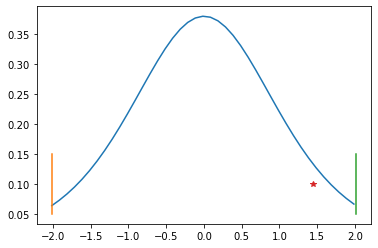

In [100]:
x=np.arange(-d["pos_critical_value"],d['pos_critical_value'],0.1)
plt.plot(x,stat.t.pdf(x,5))
a=[-d["pos_critical_value"],-d["pos_critical_value"],-d["pos_critical_value"]]
b=[0.05,0.1,0.15]
c=[d["pos_critical_value"],d["pos_critical_value"],d["pos_critical_value"]]
d=[0.05,0.1,0.15]
plt.plot(a,b)
plt.plot(c,d)
plt.plot(1.4436763449225352,0.1,marker="*")
plt.show()

In [101]:
#mean score for the class on test in not greater than 71

# Task2

In [102]:
#H0=average fill for the machines is same. s1.mean==s2.mean
#H1=average fill for the machines is different. s1_mean!=s2_mean

#2 sample t-test (two tailed test)

In [103]:
alpha=0.01
s1=np.array([4.05,4.01,4.04,4.02])
s2=np.array([4.02,3.99,4.01,3.99,4,4])
s1.mean(),s2.mean()

(4.029999999999999, 4.001666666666666)

In [104]:
def test2(s1,s2,alpha):
    d={}
    n1=len(s1)
    n2=len(s2)
    df=n1+n2-2
    neg_critical_value=stat.t.ppf(alpha/2,df)
    pos_critical_value=stat.t.ppf(1-alpha/2,df)
    t_statistic,pvalue=stat.ttest_ind(s1,s2)
    d["pos_critical_value"]=pos_critical_value
    d["neg_critical_value"]=neg_critical_value
    d["t_statistic"]=t_statistic
    d["pvalue"]=pvalue  
    return d

In [105]:
d=test2(s1,s2,alpha)
d

{'pos_critical_value': 3.3553873313333957,
 'neg_critical_value': -3.3553873313333966,
 't_statistic': 3.025960284531912,
 'pvalue': 0.01640995794152561}

In [106]:
if d['neg_critical_value']<d['t_statistic']<d['pos_critical_value'] and d['pvalue']>alpha:
    print("accept.average fill for the machines is same")
else:
    print("reject null hypothesis. average fill for the machines is different")

accept.average fill for the machines is same


In [107]:
#Average fill for both machines are same

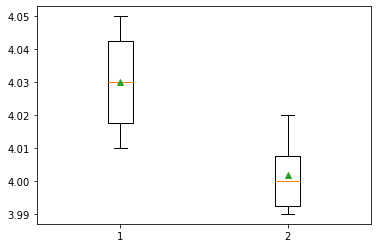

In [108]:
plt.boxplot([s1,s2],vert=True,showmeans=True)
plt.show()

# Task3

In [109]:
#null hypothesis:average fill for 4machines is same
#alternate hypothesis:average fill for atleast one machine is different

In [110]:
alpha=0.01
s1=np.array([4.05,4.01,4.04,4.02])
s2=np.array([4.02,3.99,4.01,3.99,4,4])
s3=np.array([4,3.97,3.95,3.98,3.97])
s4=np.array([4.01,4,3.99,4.02])
s1.mean(),s2.mean(),s3.mean(),s4.mean()

(4.029999999999999, 4.001666666666666, 3.974, 4.005)

In [111]:
def test3(s1,s2,s3,s4,alpha):
    d={}
    dfc=4-1
    dfr=4-1+6-1+5-1+4-1
    f_critical=stat.f.ppf(1-alpha,dfc,dfr)
    f_statistic,pvalue=stat.f_oneway(s1,s2,s3,s4)
    d["f_critical"]=f_critical
    d["f_statistic"]=f_statistic
    d["pvalue"]=pvalue
    return d

In [112]:
d=test3(s1,s2,s3,s4,alpha)
d

{'f_critical': 5.416964857818421,
 'f_statistic': 10.098402523912094,
 'pvalue': 0.000685335440647619}

In [113]:
if d["f_statistic"]<d['f_critical'] and d["pvalue"]>alpha:
    print("accept.average fill for all machines are same")
else:
    print("reject.average fill for atleast one machine is different")

reject.average fill for atleast one machine is different


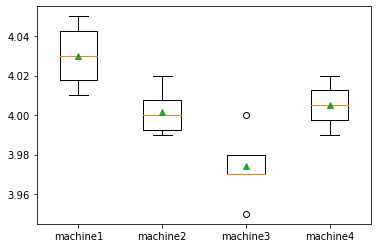

In [114]:
plt.boxplot([s1,s2,s3,s4],vert=True,showmeans=True)
plt.xticks([1,2,3,4],["machine1","machine2","machine3","machine4"])
plt.show()

In [115]:
#average fill for the machines are different